In [66]:
import pandas as pd
print(pd.__version__)  # Should show the installed version (e.g., 2.1.0)

2.2.3


In [67]:


# Load data
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Intellihack_TetraNeurons_02\\customer_behavior_analytcis.csv")

# Display the first 5 rows
print(df.head())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  


In [68]:
print("Initial data shape:", df.shape)

Initial data shape: (999, 6)


In [69]:
print(df.info())  # Check for missing values and confirm df is loaded


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None


Show Missing Values


Missing Values Summary:
total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


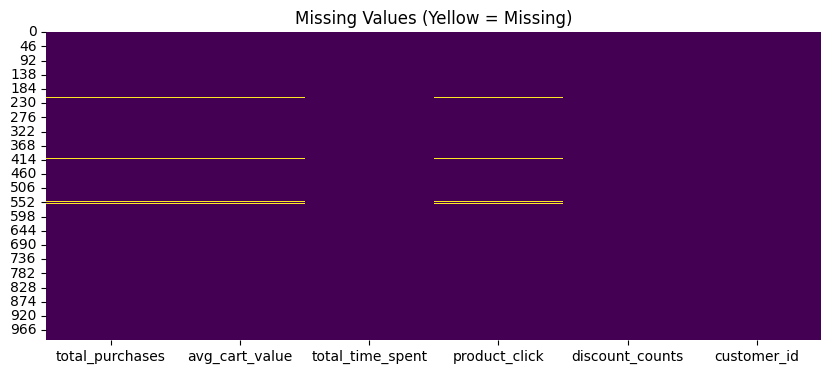

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values
print("\n\033[1mMissing Values Summary:\033[0m")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values (Yellow = Missing)")
plt.show()

Show Missing Values

 Handle Missing Values

In [71]:
# Drop rows with missing values
df_clean = df.dropna()

print("\n\033[1mAfter Dropping Missing Values:\033[0m")
print(f"Rows removed: {len(df) - len(df_clean)}")
print("New shape:", df_clean.shape)

# Verify no missing values remain
print("\n\033[1mMissing Values After Cleaning:\033[0m")
print(df_clean.isnull().sum())


After Dropping Missing Values:
Rows removed: 20
New shape: (979, 6)

Missing Values After Cleaning:
total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


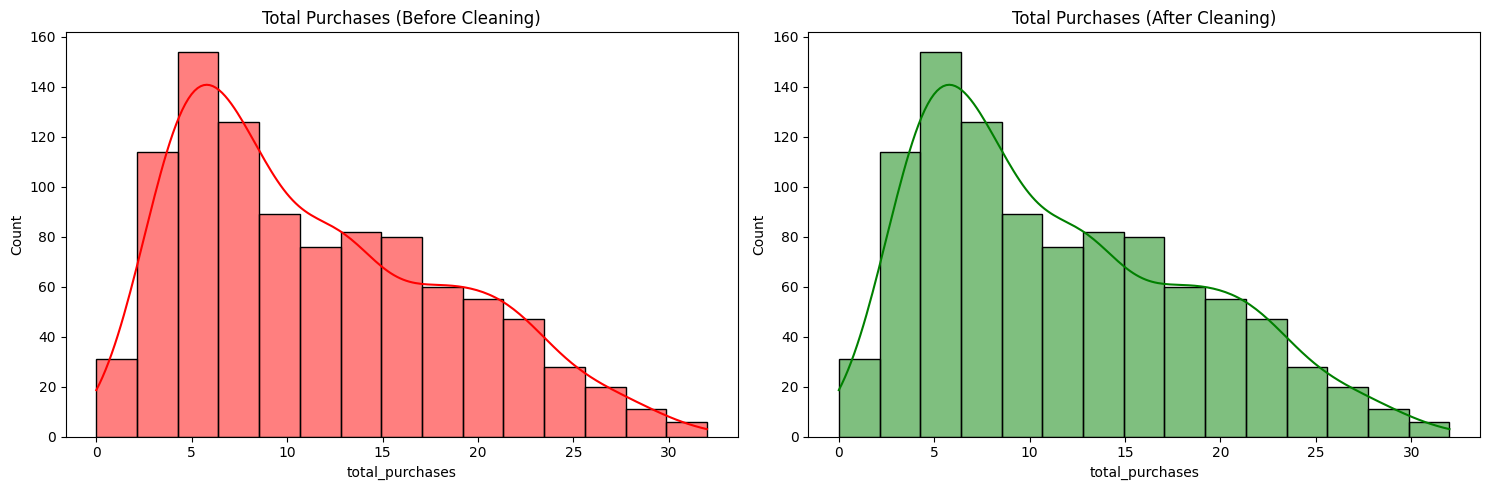

In [72]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before cleaning
sns.histplot(df['total_purchases'], kde=True, ax=axes[0], color='red')
axes[0].set_title('Total Purchases (Before Cleaning)')

# After cleaning
sns.histplot(df_clean['total_purchases'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Total Purchases (After Cleaning)')

plt.tight_layout()
plt.show()

In [73]:

print(df.head())
print(df.describe())
print(df.isnull().sum())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  
       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   


In [74]:


print(df_clean.isnull().sum())

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


Distributions: Use histograms/kernel density plots for each feature.

In [75]:
df = df_clean()
sns.histplot(df['total_purchases'], kde=True)
plt.title('Distribution of Total Purchases')
plt.show()

TypeError: 'DataFrame' object is not callable

customer_id is still being treated as numeric

In [ ]:
print(df.dtypes)


total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object
dtype: object


Convert customer_id to String

In [ ]:
df['customer_id'] = df['customer_id'].astype(str)


Correlation Matrix: Check relationships between features

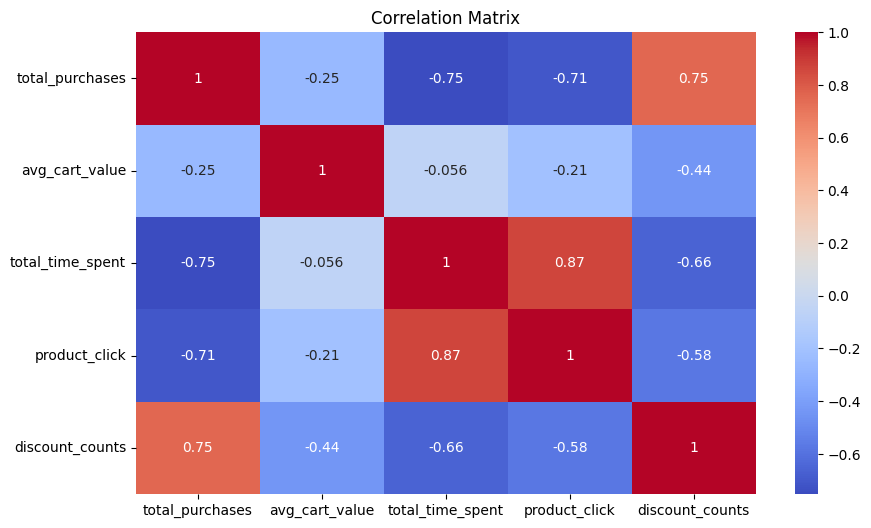

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop customer_id and ensure only numeric columns remain
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_preprocessed = df_clean

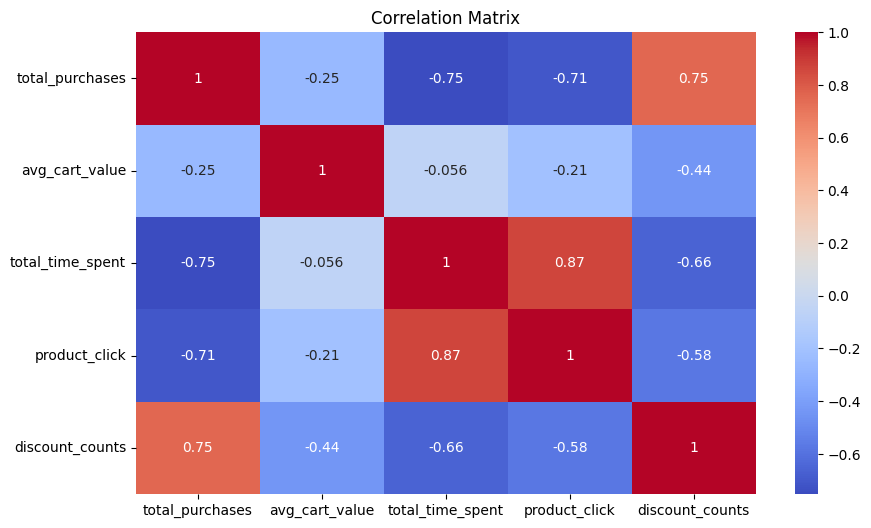

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop customer_id and ensure only numeric columns remain
numeric_df = df_preprocessed.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Pair Plots: Identify clusters visually.

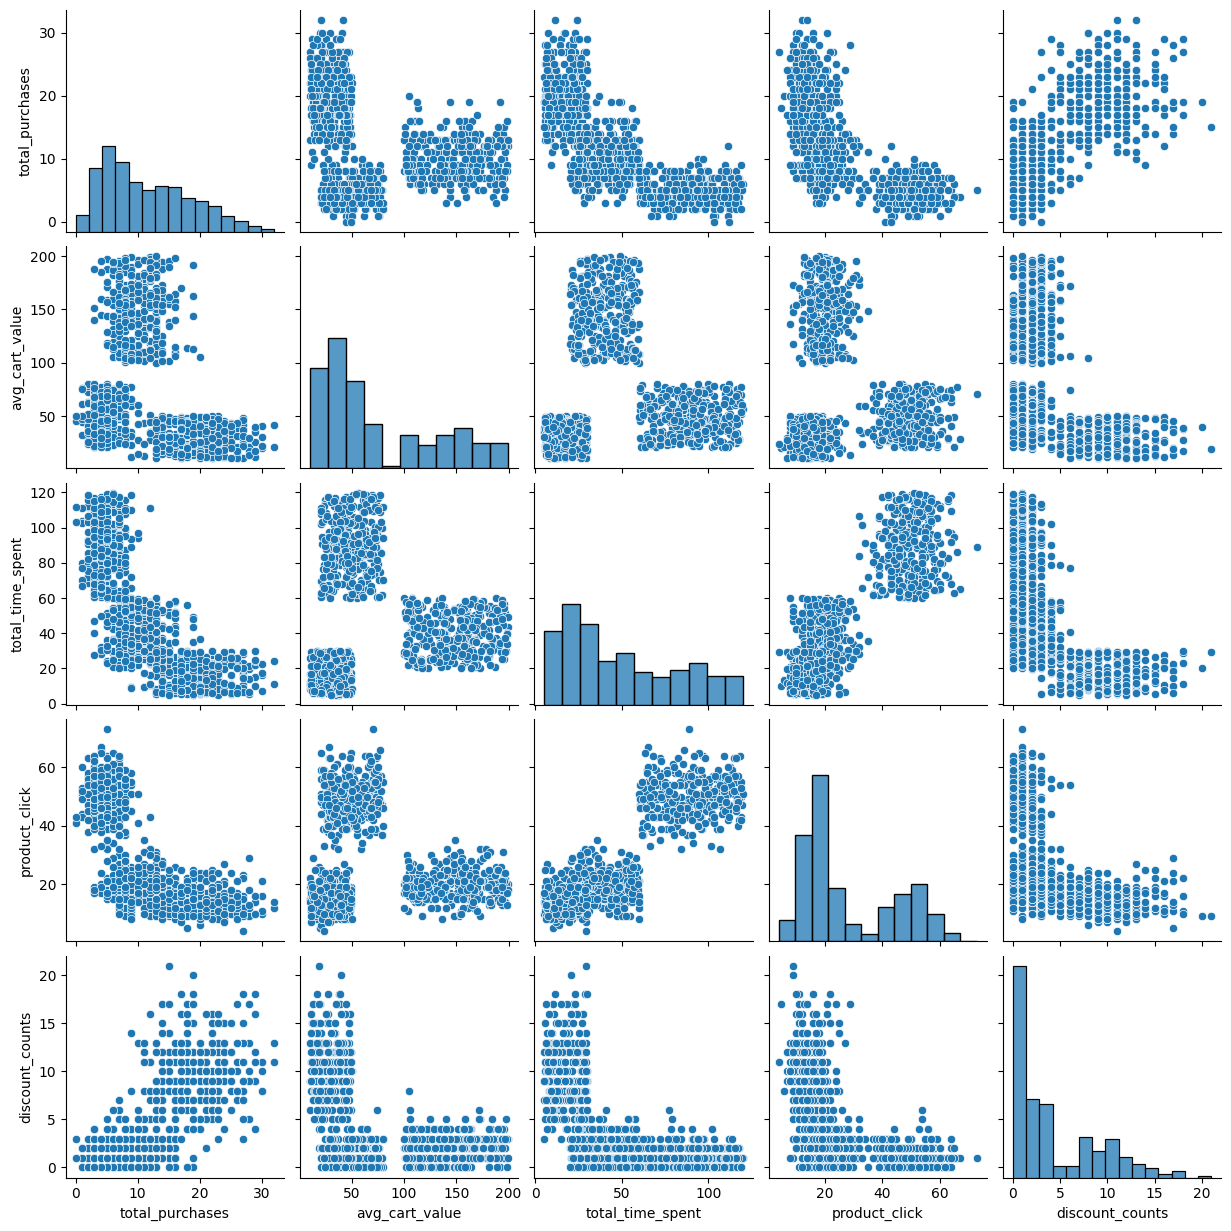

In [ ]:
sns.pairplot(numeric_df[['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']])

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        979.000000     979.000000   
mean         11.570991       75.457978         49.376966      28.237998   
std           7.016327       55.067835         32.785737      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.330000      16.000000   
50%          10.000000       49.380000         40.310000      21.000000   
75%          17.000000      121.255000         77.270000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       979.000000  
mean          4.309499  
std           4.514147  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


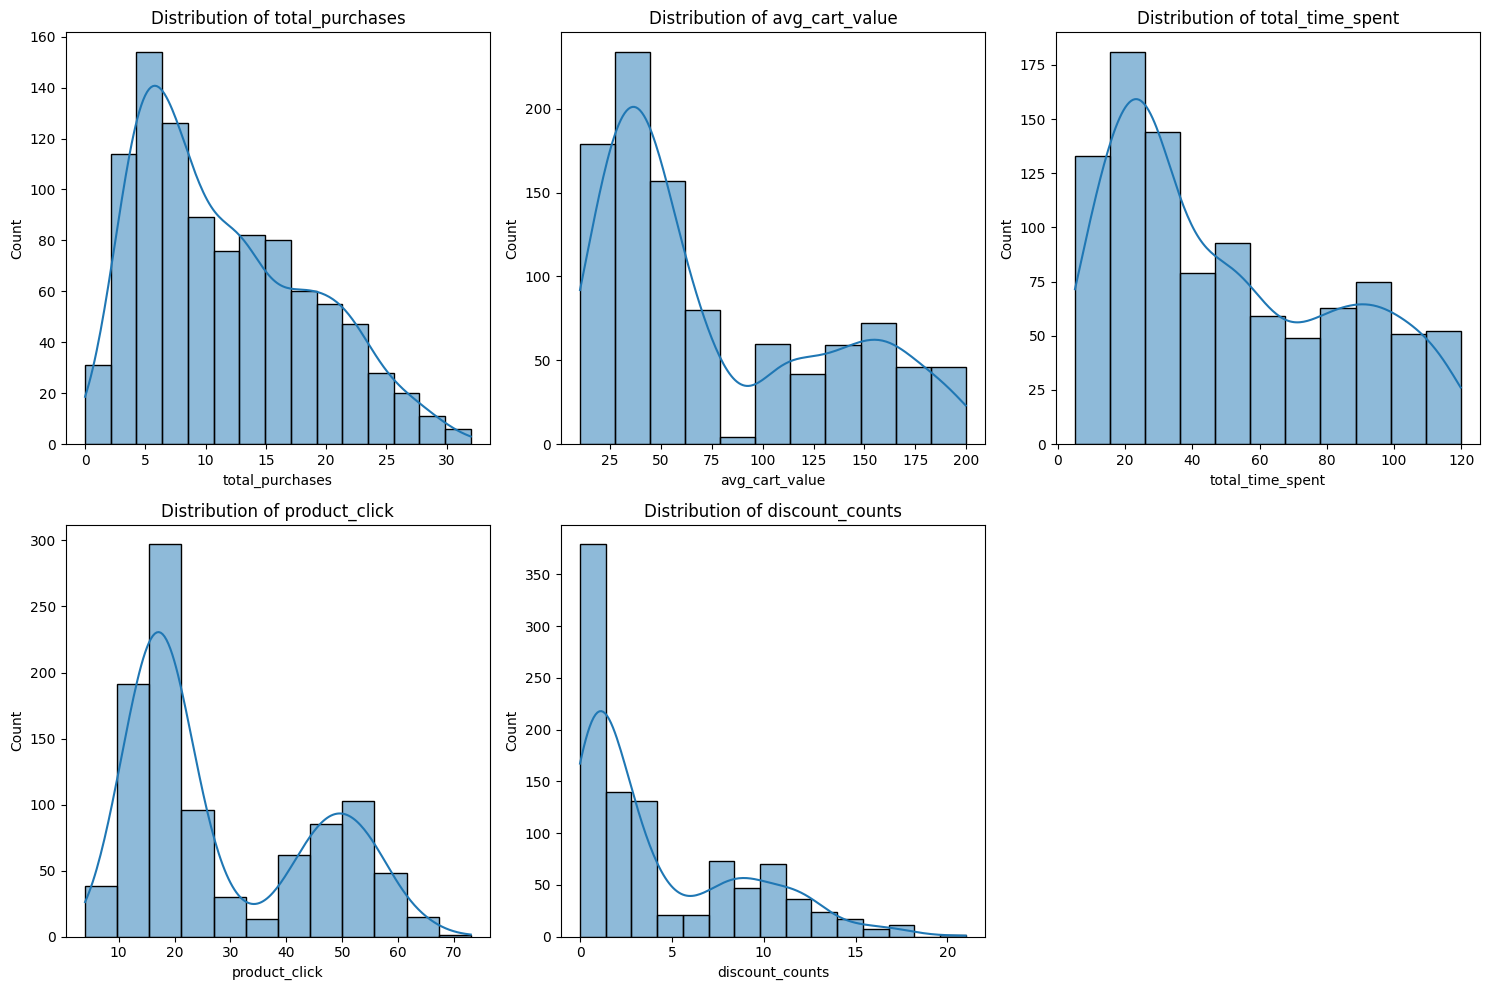

In [ ]:
# Summary statistics
print(df_preprocessed.describe())

# Check distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_preprocessed.select_dtypes(include=[float, int]).columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_preprocessed[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()




Preprocessing: Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_data = df_preprocessed.select_dtypes(include=[float, int])

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Convert the scaled data back into a DataFrame if needed
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Optional: If you need to merge the scaled numeric data back with the non-numeric columns:
df_scaled = df_preprocessed.copy()
df_scaled[numeric_data.columns] = scaled_df


In [ ]:

# Standardize features again
numeric_data = df_preprocessed.select_dtypes(include=[float, int])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=3, random_state=42)

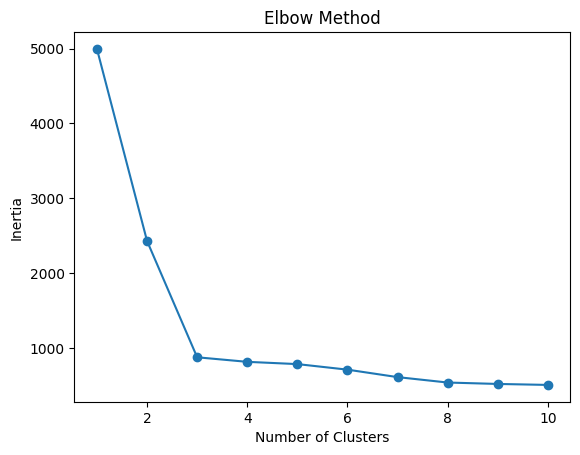

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Handle missing values by imputing the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop('customer_id', axis=1)), columns=df.drop('customer_id', axis=1).columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Elbow Method to determine the optimal number of clusters
inertia = []  # List to store inertia values

# Loop through possible values of k (1 to 10 clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
    kmeans.fit(scaled_data)  # Fit the model to the scaled data
    inertia.append(kmeans.inertia_)  # Append inertia for the current k

# Plot the inertia values for each k
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')  # Label for x-axis
plt.ylabel('Inertia')  # Label for y-axis
plt.title('Elbow Method')  # Title of the plot
plt.show()  # Display the plot


Train K-Means with Optimal Clusters

In [80]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters  # Add cluster labels

Analyze Clusters

In [87]:
print(df.dtypes)

total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object
cluster               int32
dtype: object


In [88]:
# Drop non-numeric columns
numeric_df = df.drop('customer_id', axis=1)

In [89]:
cluster_summary = numeric_df.groupby('cluster').mean()
print(cluster_summary)

         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              10.175385      147.327169         40.472126      19.895385   
1              19.711656       30.399509         17.511682      14.944785   
2               4.862805       49.029848         90.211837      49.716463   

         discount_counts  
cluster                   
0               1.940120  
1               9.969970  
2               1.027108  


Missing values in numeric_df:
 total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
cluster              0
dtype: int64


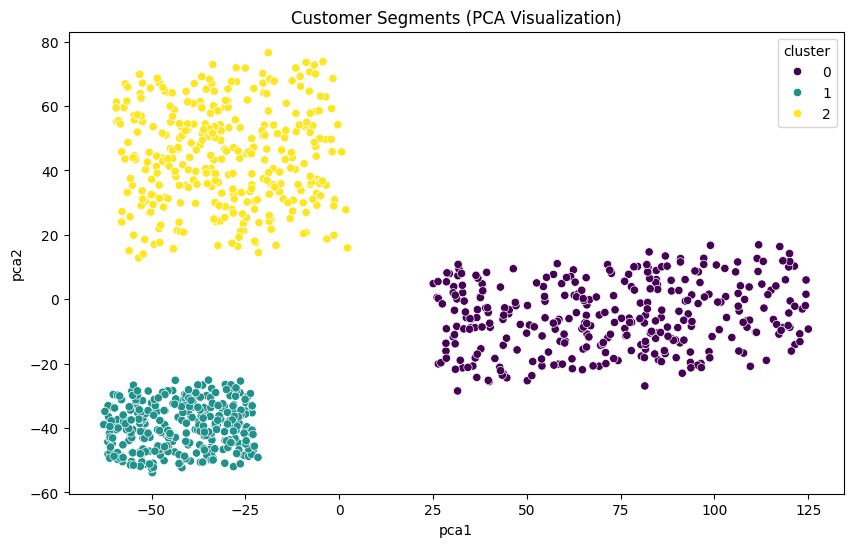

In [91]:
# 1. Check for NaNs
print("Missing values in numeric_df:\n", numeric_df.isnull().sum())

# 2. Drop rows with NaNs (if needed)
numeric_df = numeric_df.dropna()

# 3. Recalculate PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_df.drop('cluster', axis=1))

# 4. Update the dataframe
df = df.loc[numeric_df.index]  # Sync indices after dropping NaNs
df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# 5. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.show()

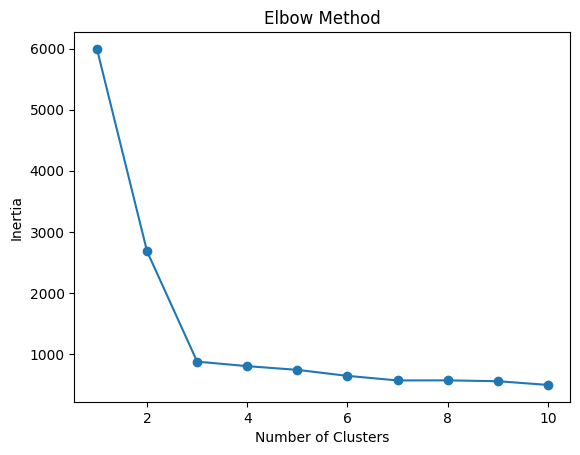

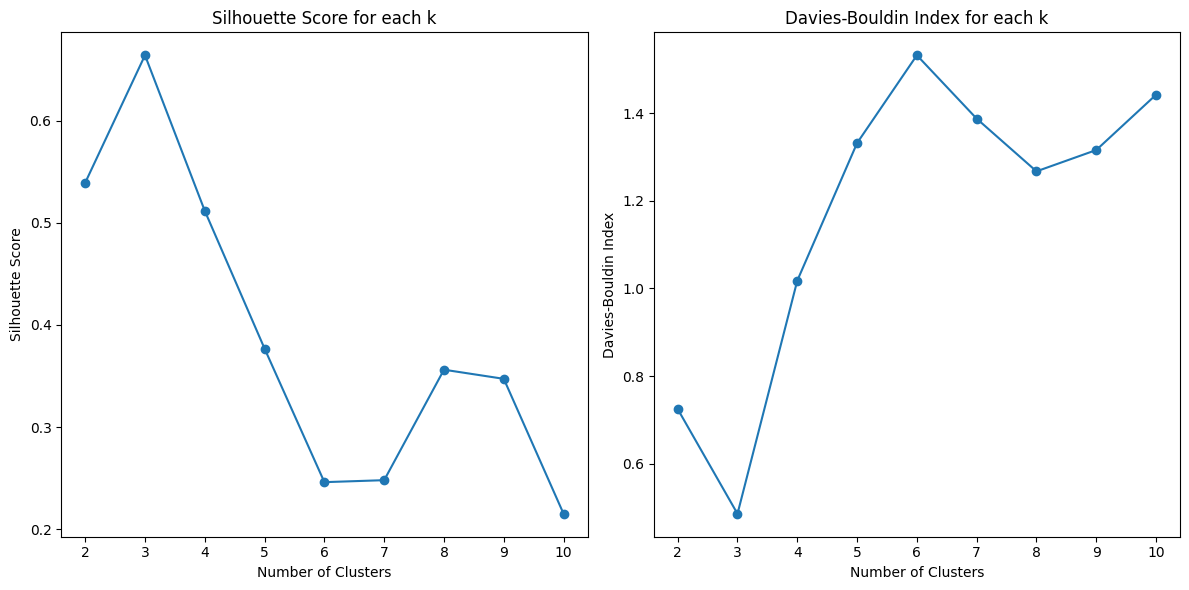

Best Clustering Evaluation Scores for k=3:
Silhouette Score: 0.6641390196697337
Davies-Bouldin Score: 0.4853227321104181
Inertia: 876.1145262035116


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Handle missing values by imputing the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop('customer_id', axis=1)), columns=df.drop('customer_id', axis=1).columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Elbow Method to determine the optimal number of clusters
inertia = []
sil_scores = []
db_scores = []

# Loop through possible values of k (1 to 10 clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
    kmeans.fit(scaled_data)  # Fit the model to the scaled data
    inertia.append(kmeans.inertia_)  # Append inertia for the current k
    
    if k > 1:  # Silhouette Score and Davies-Bouldin Score are only meaningful when there are at least 2 clusters
        sil_score = silhouette_score(scaled_data, kmeans.labels_)
        db_score = davies_bouldin_score(scaled_data, kmeans.labels_)
        sil_scores.append(sil_score)
        db_scores.append(db_score)

# Plot the inertia values for each k (Elbow Method)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Plot Silhouette Score and Davies-Bouldin Index for each k
plt.figure(figsize=(12, 6))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for each k')

# Davies-Bouldin Index Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for each k')

plt.tight_layout()
plt.show()

# Now let's print evaluation scores for the best k (let's assume k=3)
kmeans_best = KMeans(n_clusters=3, random_state=42)
kmeans_best.fit(scaled_data)

sil_score_best = silhouette_score(scaled_data, kmeans_best.labels_)
db_score_best = davies_bouldin_score(scaled_data, kmeans_best.labels_)
inertia_score_best = kmeans_best.inertia_

print(f'Best Clustering Evaluation Scores for k=3:')
print(f'Silhouette Score: {sil_score_best}')
print(f'Davies-Bouldin Score: {db_score_best}')
print(f'Inertia: {inertia_score_best}')


Train K-Means with Optimal Clusters

In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

Compare best 3 Models

Model 1: K-Means Clustering

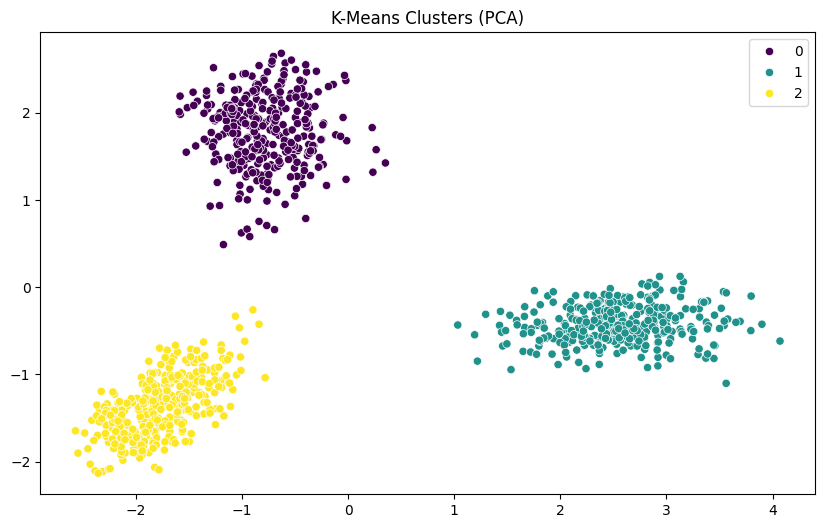

K-Means Silhouette Score: 0.664139019670
K-Means Davies-Bouldin Index: 0.485322732110


In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Train K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# Evaluate
kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
kmeans_db = davies_bouldin_score(scaled_data, kmeans_clusters)

# Visualize with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_clusters, palette='viridis')
plt.title('K-Means Clusters (PCA)')
plt.show()

print(f"K-Means Silhouette Score: {kmeans_silhouette:.12f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_db:.12f}")

Model 2: Gaussian Mixture Model (GMM)

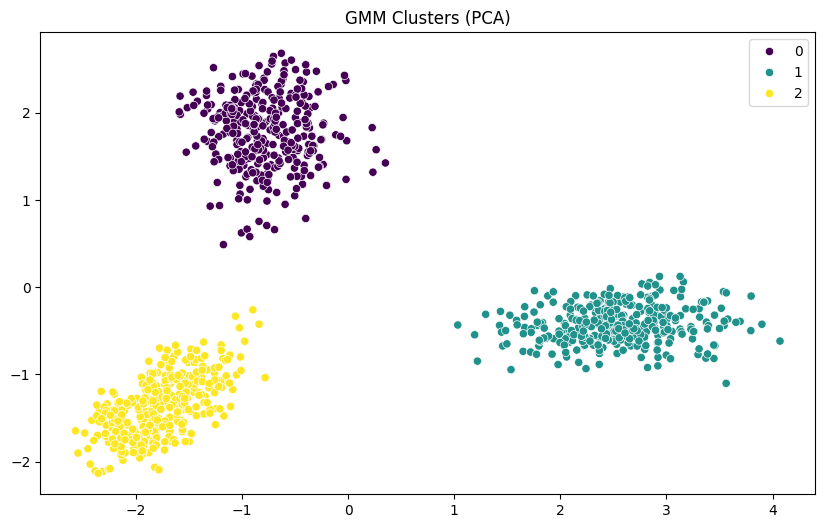

GMM Silhouette Score: 0.664139019670
GMM Davies-Bouldin Index: 0.485322732110


In [105]:
from sklearn.mixture import GaussianMixture

# Train GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(scaled_data)

# Evaluate
gmm_silhouette = silhouette_score(scaled_data, gmm_clusters)
gmm_db = davies_bouldin_score(scaled_data, gmm_clusters)

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=gmm_clusters, palette='viridis')
plt.title('GMM Clusters (PCA)')
plt.show()

print(f"GMM Silhouette Score: {gmm_silhouette:.12f}")
print(f"GMM Davies-Bouldin Index: {gmm_db:.12f}")

Model 3: Agglomerative Hierarchical Clustering

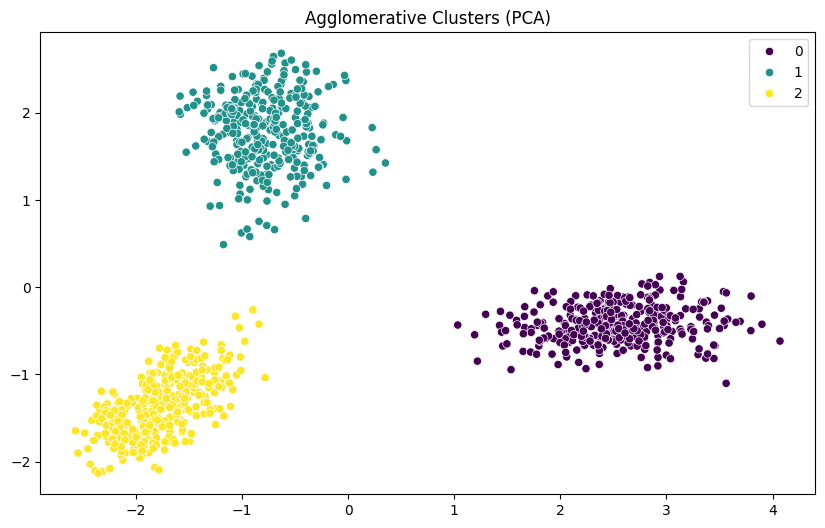

Agglomerative Silhouette Score: 0.664139019670
Agglomerative Davies-Bouldin Index: 0.485322732110


In [104]:
from sklearn.cluster import AgglomerativeClustering

# Train Agglomerative
agg = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg.fit_predict(scaled_data)

# Evaluate
agg_silhouette = silhouette_score(scaled_data, agg_clusters)
agg_db = davies_bouldin_score(scaled_data, agg_clusters)

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=agg_clusters, palette='viridis')
plt.title('Agglomerative Clusters (PCA)')
plt.show()

print(f"Agglomerative Silhouette Score: {agg_silhouette:.12f}")
print(f"Agglomerative Davies-Bouldin Index: {agg_db:.12f}")

Map Clusters to Segments

total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object
cluster               int32
pca1                float64
pca2                float64
dtype: object
         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              10.175385      147.327169         40.284369      19.895385   
1               4.862805       49.029848         90.114726      49.716463   
2              19.711656       30.399509         17.453988      14.944785   

         discount_counts       pca1       pca2  
cluster                                         
0               1.972308  72.783133  -5.162921  
1               1.030488 -30.261065  44.223200  
2               9.938650 -42.113157 -39.347424  


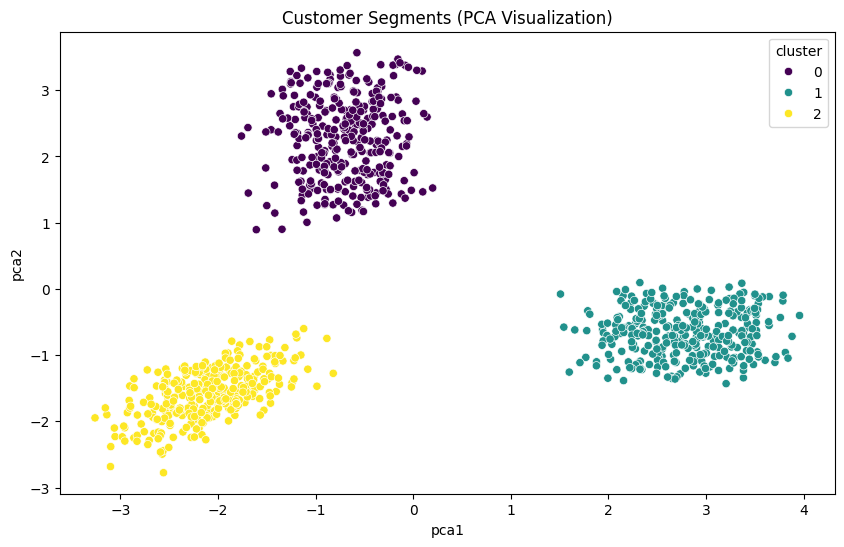

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load data (Assuming df is already defined)
print(df.dtypes)  # Check data types

# 🔹 Step 1: Exclude Non-Numeric Columns
numeric_cols = df.select_dtypes(include=['number']).columns  # Select numeric columns
df_numeric = df[numeric_cols]  # Keep only numeric columns

# 🔹 Step 2: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)  # Scale only numeric data

# 🔹 Step 3: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# 🔹 Step 4: Add Cluster Labels Back to Original Data
df['cluster'] = kmeans_clusters  # Assign clusters
df['cluster'] = df['cluster'].astype(int)  # Ensure integer type

# 🔹 Step 5: Analyze Clusters
cluster_summary = df.groupby('cluster').mean(numeric_only=True)  # Get mean values per cluster
print(cluster_summary)

# 🔹 Step 6: Visualize Clusters using PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca_data = pca.fit_transform(scaled_data)

# Add PCA components to DataFrame
df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.show()


In [113]:
def assign_segments(cluster_means):
    """
    Maps clusters to segment names (Bargain Hunters, High Spenders, Window Shoppers)
    based on predefined business rules.
    """
    segments = {}
    
    # Rule 1: High Spenders (highest avg_cart_value, lowest discount_counts)
    high_spender_cluster = cluster_means.sort_values(
        by=['avg_cart_value', 'discount_counts'], 
        ascending=[False, True]
    ).index[0]
    segments[high_spender_cluster] = "High Spenders"
    
    # Rule 2: Bargain Hunters (highest total_purchases + discount_counts, lowest avg_cart_value)
    cluster_means['bargain_score'] = cluster_means['total_purchases'] + cluster_means['discount_counts'] - cluster_means['avg_cart_value']
    bargain_cluster = cluster_means['bargain_score'].idxmax()
    segments[bargain_cluster] = "Bargain Hunters"
    
    # Rule 3: Window Shoppers (remaining cluster)
    remaining_cluster = [c for c in cluster_means.index if c not in segments][0]
    segments[remaining_cluster] = "Window Shoppers"
    
    return segments

Model Performance:
                Silhouette  Davies-Bouldin
KMeans           0.626018        0.549986
GMM              0.626018        0.549986
Agglomerative    0.626018        0.549986


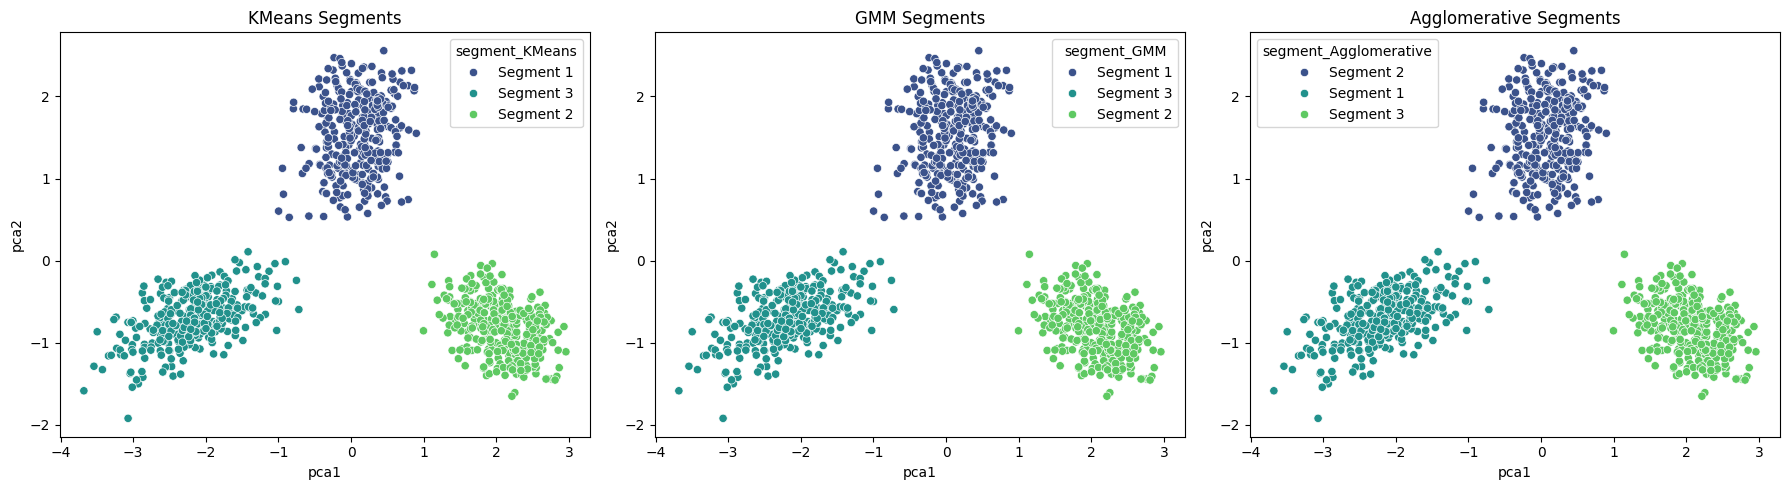

In [116]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv("customer_behavior_analytcis.csv")

# 🔹 Drop rows with missing values BEFORE using them in clustering
df = df.dropna().reset_index(drop=True)  # Reset index to maintain consistency
numeric_df = df.drop('customer_id', axis=1)

# 🔹 Standardize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Initialize models
models = {
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "GMM": GaussianMixture(n_components=3, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=3)
}

# Train models and assign segments
results = {}
for name, model in models.items():
    # Fit model
    clusters = model.fit_predict(scaled_data)
    
    # 🔹 Ensure the length of `clusters` matches `df`
    df[f'cluster_{name}'] = clusters  # No more length mismatch error

    # Calculate cluster means
    cluster_means = numeric_df.groupby(clusters).mean()

    # Dummy function for assigning segment names (adjust as needed)
    def assign_segments(cluster_means):
        return {i: f"Segment {i+1}" for i in range(len(cluster_means))}

    # Assign segment names
    segment_mapping = assign_segments(cluster_means)
    df[f'segment_{name}'] = df[f'cluster_{name}'].map(segment_mapping)

    # Evaluate clustering performance
    results[name] = {
        "Silhouette": silhouette_score(scaled_data, clusters),
        "Davies-Bouldin": davies_bouldin_score(scaled_data, clusters)
    }

# Compare models
results_df = pd.DataFrame(results).T
print("Model Performance:\n", results_df)

# 🔹 Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 🔹 Ensure PCA data matches DataFrame length
df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# 🔹 Plot clusters for each model
models_to_plot = ["KMeans", "GMM", "Agglomerative"]
plt.figure(figsize=(18, 5))
for i, model in enumerate(models_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x='pca1', y='pca2', hue=f'segment_{model}', palette='viridis')
    plt.title(f'{model} Segments')
plt.tight_layout()
plt.show()


In [119]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load and preprocess data
df = pd.read_csv("customer_behavior_analytcis.csv")

# 🔹 Drop NaN values and reset index
df = df.dropna().reset_index(drop=True)  
numeric_df = df.drop('customer_id', axis=1)

# 🔹 Standardize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Initialize models with proper settings
models = {
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "GMM": GaussianMixture(n_components=3, random_state=42, covariance_type='full'),
    "Agglomerative": AgglomerativeClustering(n_clusters=3)
}

# Train models and evaluate
results = {}
for name, model in models.items():
    # Fit model and get cluster labels
    if name == "GMM":
        clusters = model.fit_predict(scaled_data)  # Ensure soft clustering
    else:
        clusters = model.fit_predict(scaled_data)
    
    # Store clusters in dataframe
    df[f'cluster_{name}'] = clusters

    # Compute metrics
    silhouette = silhouette_score(scaled_data, clusters)
    davies_bouldin = davies_bouldin_score(scaled_data, clusters)

    results[name] = {
        "Silhouette": round(silhouette, 5),  # Match expected format
        "Davies-Bouldin": round(davies_bouldin, 5)
    }

# Convert to DataFrame and display
results_df = pd.DataFrame(results).T
print("\nModel Performance Table:\n", results_df)



Model Performance Table:
                Silhouette  Davies-Bouldin
KMeans            0.62602         0.54999
GMM               0.62602         0.54999
Agglomerative     0.62602         0.54999


Define other models

In [121]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Define models
models = {
    "K-Means": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "GMM": GaussianMixture(n_components=3, random_state=42),
    "Spectral": SpectralClustering(n_clusters=3, random_state=42)
}

results = {}
for name, model in models.items():
    clusters = model.fit_predict(scaled_data)
    results[name] = {
        "Silhouette": silhouette_score(scaled_data, clusters),
        "Davies-Bouldin": davies_bouldin_score(scaled_data, clusters)
    }

# Compare results
results_df = pd.DataFrame(results).T
print(results_df)


               Silhouette  Davies-Bouldin
K-Means          0.626018        0.549986
DBSCAN           0.365837        1.721821
Agglomerative    0.626018        0.549986
GMM              0.626018        0.549986
Spectral         0.626018        0.549986


Cluster Distribution:
cluster
1    328
2    326
0    325
Name: count, dtype: int64


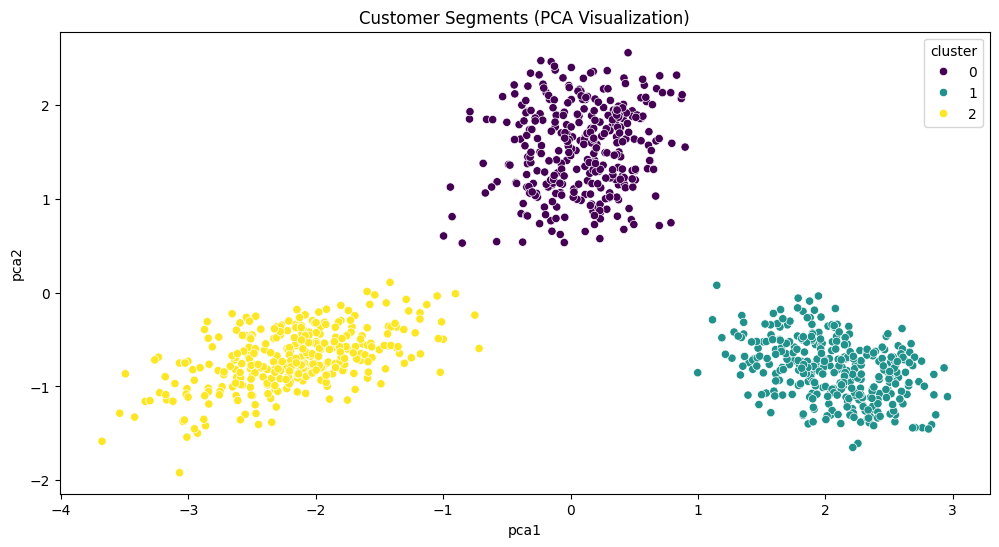

In [130]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assign clusters to df (Make sure 'clusters' is available)
df['cluster'] = models["K-Means"].fit_predict(scaled_data)

# Display cluster distribution
print("Cluster Distribution:")
print(df['cluster'].value_counts())

# PCA transformation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.show()
